In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [15]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
for col in df.columns:
    print (col)
    print (df[col].unique())
    print ()

MedInc
[8.3252 8.3014 7.2574 ... 2.3598 2.3661 2.0943]

HouseAge
[41. 21. 52. 42. 50. 40. 49. 48. 51. 43.  2. 46. 26. 20. 17. 36. 19. 23.
 38. 35. 10. 16. 27. 39. 31. 29. 22. 37. 28. 34. 32. 47. 44. 30. 18. 45.
 33. 24. 15. 14. 13. 25.  5. 12.  6.  8.  9.  7.  3.  4. 11.  1.]

AveRooms
[6.98412698 6.23813708 8.28813559 ... 5.20554273 5.32951289 5.25471698]

AveBedrms
[1.02380952 0.97188049 1.07344633 ... 1.14825581 1.17191977 1.16226415]

Population
[ 322. 2401.  496. ... 3060. 2707. 6912.]

AveOccup
[2.55555556 2.10984183 2.80225989 ... 2.3256351  2.12320917 2.61698113]

Latitude
[37.88 37.86 37.85 37.84 37.83 37.82 37.81 37.8  37.79 37.77 37.78 37.76
 37.75 37.74 37.73 37.9  37.89 37.87 37.72 37.71 37.7  37.69 37.68 37.64
 37.63 37.66 37.65 37.67 37.61 37.62 37.6  37.59 37.58 37.57 37.49 37.52
 37.56 37.55 37.54 37.53 37.51 37.48 37.47 37.5  38.69 38.72 38.52 38.48
 38.45 38.46 38.43 38.55 38.54 38.51 38.5  38.47 38.44 38.42 38.37 38.34
 38.32 38.26 38.38 38.4  38.39 38.36 38.31 39.7

<Axes: xlabel='MedHouseVal', ylabel='Count'>

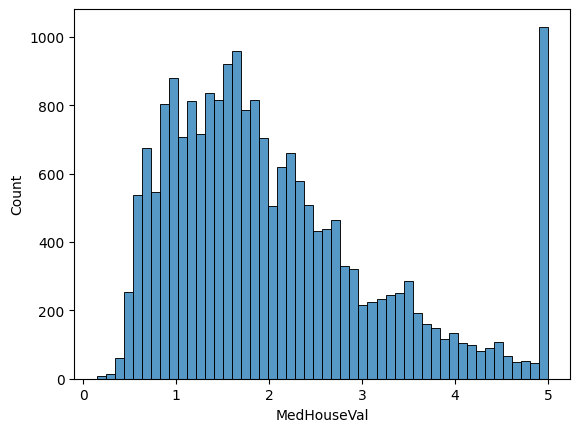

In [18]:
sns.histplot(df.MedHouseVal, bins=50)

In [21]:
n = len(df)

n_val = int(n*.2)
n_test = int(n*.2)
n_train = n - n_val - n_test

n_train, n_val, n_test

(12384, 4128, 4128)

In [22]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

In [124]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

len(df_train), len(df_test), len(df_val)

(12384, 4128, 4128)

In [125]:
df_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20558,4.5526,10.0,5.518519,1.005291,1073.0,2.838624,38.67,-121.80,1.544
11430,5.8541,22.0,6.448105,0.988468,1871.0,3.082372,33.66,-117.97,2.815
2656,1.9417,32.0,7.647059,2.240642,434.0,2.320856,40.28,-124.25,0.761
14267,1.5933,37.0,3.998331,1.046745,2489.0,4.155259,32.69,-117.11,0.863
3684,3.1563,36.0,4.594059,1.075908,1181.0,3.897690,34.21,-118.37,1.764


In [126]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
y_train = df_train.MedHouseVal.values
y_test = df_test.MedHouseVal.values
y_val = df_val.MedHouseVal.values
del df_train['MedHouseVal']
del df_test['MedHouseVal']
del df_val['MedHouseVal']

In [199]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

def prepare_X(df):
    df = df.copy()
    #df['LgAveRooms'] = np.log1p(df.AveRooms)
    df['LgBedrms'] = np.log1p(df.AveBedrms)
    #df['LgOcc'] = np.log1p(df.AveOccup)
    #df['PopRms'] = np.log1p(df.AveRooms / df.Population)
    df['PopBeds'] = np.log1p(df.AveBedrms / df.Population)
    df['BedsvRms'] = np.log1p(df.AveBedrms / df.AveRooms)
    #df['BedsvOcc'] = np.log1p(df.AveBedrms / df.AveOccup)
    df['RmsvOcc'] = np.log1p(df.AveRooms / df.AveOccup)
    X = df.values
    return X

def train_linear_regression_reg (X, y, r=0.001):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [200]:
#base = ['MedInc','HouseAge', 'AveRooms','AveBedrms', 'Population','Latitude','Longitude','AveOccup']

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.6624969421826112)

In [201]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r= 0.001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.6624960895487852)

<Axes: ylabel='Count'>

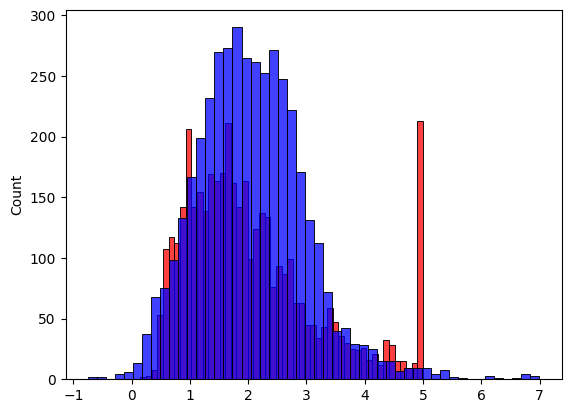

In [202]:
sns.histplot(y_val, color = 'red', bins=50)
sns.histplot(y_pred, color = 'blue', bins = 50)

<Axes: ylabel='Count'>

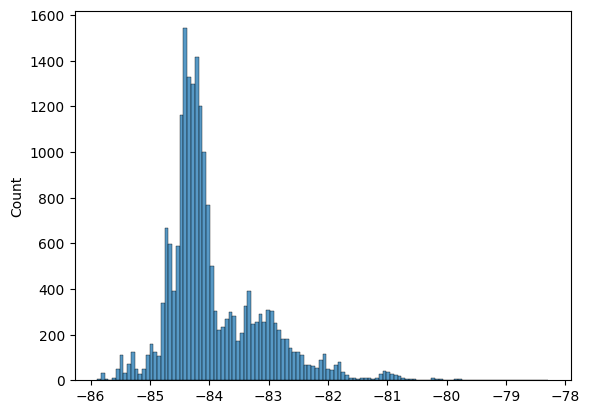

In [153]:
sns.histplot(df.Latitude + df.Longitude)